In [1]:
# Packages
import gene_model
import gfs
import color_scheme
import simulator

from matplotlib import pyplot as plt
import seaborn as sns

import sbi
import numpy as np
import multiprocessing

import torch

from sbi.analysis import pairplot
from sbi.inference import NPE
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

from concurrent.futures import ProcessPoolExecutor, as_completed


# Simulation Parameters

hgt_rate_max = 0.5 # Maximum hgt rate
hgt_rate_min = 0 # Minimum hgt rate
    

prior = BoxUniform(low=hgt_rate_min * torch.ones(1), high=hgt_rate_max * torch.ones(1))

In [6]:
inference = NPE(prior=prior)
  
num_simulations = 1

parallel_size = 1
# data = None
# hgt_rate_data = None

for i in range(num_simulations // parallel_size):  

    hgt_rate_train = prior.sample((parallel_size,))

    x_train = simulator.simulator(hgt_rate_train)  
    
    x_train_flat = x_train.to(torch.float32)
    
    if data is None:
        data = x_train_flat  # Erster Durchlauf
        hgt_rate_data = hgt_rate_train
    else:
        data = torch.cat((data, x_train_flat), dim=0)
        hgt_rate_data = torch.cat((hgt_rate_data, hgt_rate_train), dim=0)

print(data)
print(hgt_rate_data)

tensor([[ 0.,  8., 11.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  5.,  9.,  0.,  1.,  0.,  6.,  0.,  0.,  0.],
        [ 0.,  6.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 11.,  2.,  5.,  2.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 25.,  4.,  2.,  1.,  4.,  0.,  0.,  3.,  3.,  0.],
        [ 0.,  6.,  6.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.],
        [ 0.,  7.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.],
        [ 0., 25.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  8.,  0.],
        [ 0., 16.,  3.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 18.,  5., 16.,  3.,  1.,  0., 14.,  0.,  0.,  0.],
        [ 0.,  3.,  2., 14.,  0.,  2.,  0.,  6.,  0.,  0.,  0.],
        [ 0.,  6.,  5.,  2.,  3.,  0.,  0.,  2.,  2.,  0.,  0.],
        [ 0., 14.,  3.,  6.,  8.,  0.,  9.,  0.,  0.,  0.,  0.],
        [ 0.,  9.,  1.,  5.,  2.,  1.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  3., 21.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.],
        [ 0., 10.,  0.,  

In [3]:
# Check prior, return PyTorch prior.
prior, num_parameters, prior_returns_numpy = process_prior(prior)

# Check simulator, returns PyTorch simulator able to simulate batches.
simulator_test = process_simulator(simulator.simulator, prior, prior_returns_numpy)

# Consistency check after making ready for sbi.
check_sbi_inputs(simulator_test, prior)


In [5]:
print(hgt_rate_data)

tensor([[0.3263],
        [0.2935],
        [0.2818],
        [0.4879]])


In [13]:
hgt_rate = prior.sample((10,))

results = [simulator.simulation(rate.item()) for rate in hgt_rate.numpy()]


#%run simulator.py


3
5
[  0  22  34  35  44  48  53  55  57  63  76  79  83  91  92 131 135 160
 163 165 168 171 176 179 189 204 209 227 230 244]
4
5
[ 0. 20.  7.  1.  0.  0.  0.  0.  0.  3.  0.]
3
5
[  2  14  22  23  26  44  45  48  50  56  66  73 104 105 115 122 136 137
 142 159 167 180 183 190 191 208 210 223 249]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 135 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


4
5
[ 0. 32.  4.  8.  0.  1.  4.  0.  0. 12.  0.]
3
5
[  7  20  22  52  53  55  66  74  83 111 112 121 140 148 161 163 173 177
 182 200 205 216 220 224 230 232 235 244 246 249]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 112 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


4
5
[ 0. 40.  3.  2.  0.  0.  0.  0.  0. 16.  0.]
3
5
[ 22  34  42  52  56  57  68  73  75  78  81  94 106 119 145 152 155 159
 160 163 171 194 200 232 237 248]
4
5
[ 0. 21.  5.  0.  5.  1.  0.  0.  0. 20.  0.]
3
5
[ 10  13  28  29  39  62  68  91 104 105 106 110 111 126 130 137 139 142
 163 164 195 197 228]
4
5
[0. 6. 7. 2. 3. 3. 0. 0. 0. 0. 0.]
3
5
[ 11  71  79  97 100 119 126 130 133 146 148 158 176 194 198 227 241]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 74 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


4
5
[ 0. 10. 11.  3.  0. 10.  0.  1.  0.  0.  0.]
3
5
[  3   5  22  27  37  44  51  52  62  66  77  79  82  87  89  94 102 104
 108 119 122 146 159 161 162 164 188 193 195 204 206 227 248]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 72 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


4
5
[ 0.  8.  1.  4. 11.  0. 10.  0.  0.  0.  0.]
3
5
[  5   7  22  23  29  34  36  45  48  64  73  95 102 109 121 129 137 152
 162 227 231 234 241 243 244]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 43 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


4
5
[0. 4. 3. 1. 0. 0. 2. 3. 0. 0. 0.]
3
5
[  0   2   3   9  16  21  24  33  43  48  52  53  60  69  77  82  87  89
  91 104 106 120 151 155 181 204 210 228 246 248]
4
5
[ 0. 18. 14.  6.  7.  6.  0.  1.  0.  6.  0.]
3
5
[  0  16  22  24  39  63  72  78  86  90  95 105 107 110 114 115 118 132
 134 137 144 147 164 172 184 222 223 242 246]
4
5
[ 0.  7.  2.  1.  1. 14.  0.  2.  0.  0.  0.]


C:\Users\uhewm\OneDrive\PhD\Project No.2\pangenome-gene-transfer-simulation\gene_model.py:232: RuntimeWarning: 58 double mutation (present -> present) occured. It is recommended to increase the num_sites to 250 or higher. Alternatily use the double_site_relocation or relocate_double_gene_gain option.
  warnings.warn(


In [ ]:
from sbi.neural_nets import posterior_nn
from sbi.neural_nets.embedding_nets import CNNEmbedding

# Define setup parameters
embedding_net = CNNEmbedding(
    input_shape=(num_sites * 2, num_samples),
    in_channels=1,
    out_channels_per_layer=[20],
    num_conv_layers=1,
    num_linear_layers=1,
    output_dim=1,
    kernel_size=1,
    pool_kernel_size=1
)

# Reinitialize the density estimator and inference procedure
neural_posterior = posterior_nn(model="maf", embedding_net=embedding_net)
inferer = NPE(prior=prior, density_estimator=neural_posterior)

# Append new simulations and begin from scratch
density_estimator = inferer.append_simulations(hgt_rate_train, x_train).train()

# Build the posterior
posterior = inference.build_posterior(density_estimator)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class GeneRatePredictor(nn.Module):
    def __init__(self, input_size):
        super(GeneRatePredictor, self).__init__()
        # Definieren Sie die Architektur
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),  # Erste verborgene Schicht
            nn.ReLU(),
            nn.Linear(64, 32),          # Zweite verborgene Schicht
            nn.ReLU(),
            nn.Linear(32, 1),           # Ausgabeschicht
            nn.ReLU()
        )

    def forward(self, x):
        return self.model(x)

# Modellinstanziierung
model = GeneRatePredictor(num_sites*num_samples*2)

# Reinitialize the density estimator and inference procedure
neural_posterior = posterior_nn(model="maf", embedding_net=model)
inferer = NPE(prior=prior, density_estimator=neural_posterior)

# Append new simulations and begin from scratch
density_estimator = inferer.append_simulations(hgt_rate_train, x_train_flat).train()

# Build the posterior
posterior = inference.build_posterior(density_estimator)


In [16]:
inference = NPE(prior=prior)

inference = inference.append_simulations(hgt_rate_train.to(torch.float32), x_train_flat.to(torch.float32))

density_estimator = inference.train()

posterior = inference.build_posterior(density_estimator)


C:\Users\uhewm\anaconda3\envs\pangenome-hgt-sim\Lib\site-packages\sbi\neural_nets\net_builders\flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  x_numel = get_numel(


 Neural network successfully converged after 32 epochs.

In [ ]:
mts = gene_model.gene_model(
        theta=theta*20,
        rho=rho*10,
        gene_conversion_rate=gene_conv,
        recombination_rate=recomb,
        hgt_rate=0.05,
        num_samples=num_samples,
        num_sites=num_sites,
        double_site_relocation=True, # Fix double gene gain events, won't hide the warning.
        )

matrix = np.zeros((num_sites*2, num_samples))

for var in mts.variants():
            if 'present' in var.alleles and 'absent' in var.alleles: # Gene present and absent in different samples
                matrix[int(var.site.position),:] = var.genotypes
            elif 'present' in var.alleles: # Gene present in all samples
                matrix[int(var.site.position),:] = np.ones(num_samples)
                
gfs = matrix.sum(0)

In [ ]:
#print(gfs)
mts.allele_frequency_spectrum(span_normalise = False, polarised = True)
#print(matrix)

In [ ]:
mean = (sum(abs(torch.clamp(model(x_train_flat), min=0) - hgt_rate_train)))/len(hgt_rate_train)

print(mean)
max(model(x_train_flat))

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\uhewm\AppData\Local\Temp\ipykernel_16956\403617829.py:8: DeprecationWarning: you passed deprecated arguments **kwargs: ['points_colors'], use fig_kwargs instead. We continue calling the deprecated pairplot function
  pairplot(samples, points=[hgt_rate_test], points_colors=['r'] )


(<Figure size 1000x1000 with 1 Axes>,
 array([[<Axes: xlabel='dim 1'>]], dtype=object))

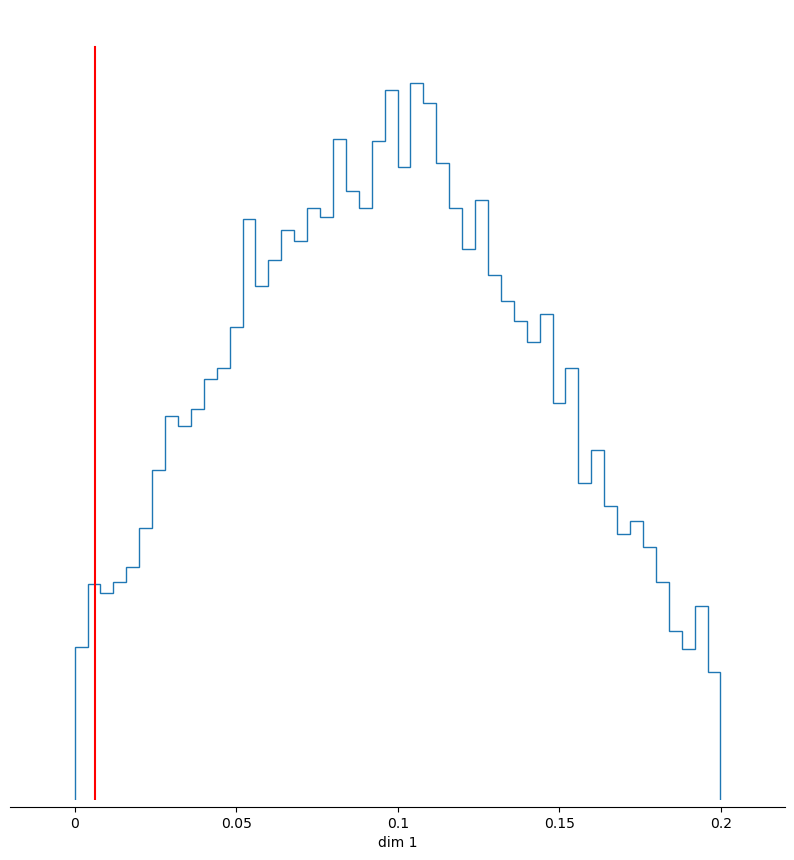

In [20]:
hgt_rate_test = prior.sample((1,))
x_test = simulator.simulator(hgt_rate_test)
x_test_flat = x_test.view(x_test.size(0), -1)

samples = posterior.sample((10000,), x=x_test_flat)

# print(model(x_test_flat).item())
pairplot(samples, points=[hgt_rate_test], points_colors=['r'] )

In [ ]:
samples